## Assignment 8.1P - SIT720
## Name: Shadan Khan
## Student ID: s222623809

### Question 1
Read the “Dataset3.csv” and print the dimension of the dataset. Apply PCA on the dataset and
select the first three components except "Target". Print the dimensions of modified dataset
and visualise the data using appropriate plotting tool/s.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset from a CSV file with semicolon delimiter
weather_data = pd.read_csv('Dataset3.csv', sep=';')

# Show the dimensions (rows, columns) of the dataset
print(f"Dataset dimensions: {weather_data.shape}")

Dataset dimensions: (4424, 37)


PCA result shape: (4424, 3)


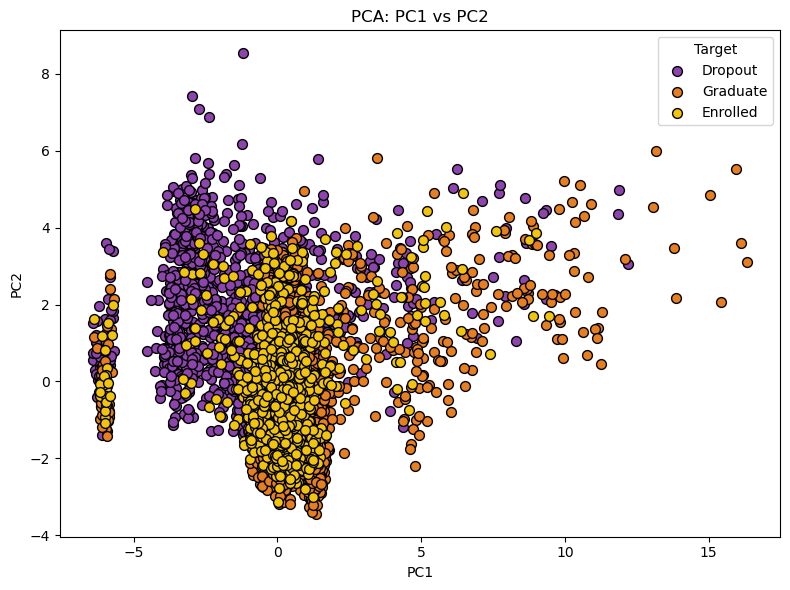

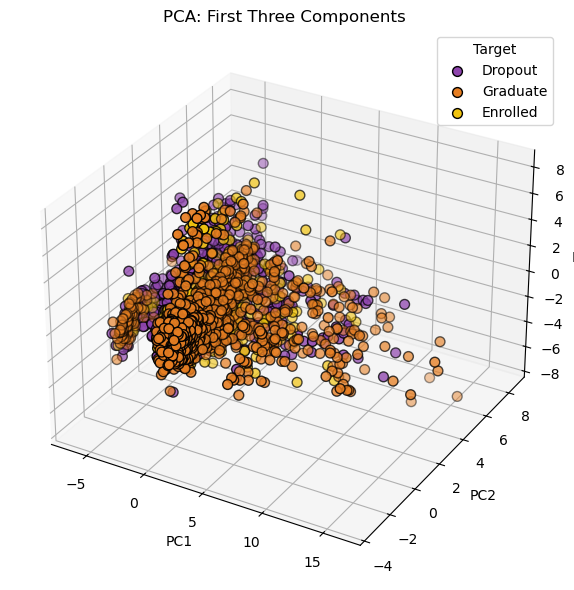

In [7]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Run scaling + PCA
X = weather_data.drop('Target', axis=1)
y = weather_data['Target']
pipeline = make_pipeline(StandardScaler(), PCA(n_components=3))
X_pca = pipeline.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
print(f"PCA result shape: {pca_df.shape}")

# Define your exact colors
palette = {
    'Dropout':  '#8e44ad',  # deep purple
    'Graduate': '#e67e22',  # orange-red (as “pink” stand-in)
    'Enrolled': '#f1c40f'   # bright yellow-orange
}

# 2D scatter with legend
fig, ax = plt.subplots(figsize=(8,6))
for label, color in palette.items():
    mask = (y == label)
    ax.scatter(
        pca_df.loc[mask, 'PC1'],
        pca_df.loc[mask, 'PC2'],
        c=color, label=label,
        edgecolor='k', s=50
    )
ax.set(xlabel='PC1', ylabel='PC2', title='PCA: PC1 vs PC2')
ax.legend(title='Target')
plt.tight_layout()
plt.show()

# 3D scatter with legend
fig = plt.figure(figsize=(8,6))
ax3 = fig.add_subplot(111, projection='3d')
for label, color in palette.items():
    mask = (y == label)
    ax3.scatter(
        pca_df.loc[mask, 'PC1'],
        pca_df.loc[mask, 'PC2'],
        pca_df.loc[mask, 'PC3'],
        c=color, label=label,
        edgecolor='k', s=50
    )
ax3.set(xlabel='PC1', ylabel='PC2', zlabel='PC3',
        title='PCA: First Three Components')
ax3.legend(title='Target', loc='upper right')
plt.tight_layout()
plt.show()


### PCA Workflow Summary

I began by separating the input features from the `Target` column and applied a `StandardScaler` followed by `PCA(n_components=3)` using a pipeline. The transformed data was loaded into a DataFrame with columns `PC1`, `PC2`, and `PC3`. A custom color palette was defined to map each class ("Dropout", "Graduate", "Enrolled") to a specific hue. Two visualizations were generated:

#### 2D Scatter Plot (PC1 vs. PC2)
- For each target label, points were plotted in the assigned color with a black edge and size 50.
- Axis labels, a title, and a discrete legend titled "Target" were added.

#### 3D Scatter Plot (PC1, PC2, PC3)
- The same label-by-label approach was used in a 3D subplot, with matching colors and styling.
- All three axes were labeled, the chart was titled, and the legend was positioned in the upper right.

This workflow condenses the high-dimensional dataset into three principal axes, clearly distinguishing each class and making the underlying structure immediately visible.

---

#### Dataset Dimensions

| Dataset         | Rows | Columns |
|-----------------|------|---------|
| Original        | 4424 | 37      |
| After PCA (PCs) | 4424 | 3       |

---

#### Example of PCA-Transformed Data

|    |    PC1    |    PC2    |    PC3    |
|----|-----------|-----------|-----------|
| 0  | -6.101294 | -0.296791 | -1.428491 |
| 1  | -0.254507 | -1.106861 | -1.841772 |
| 2  | -3.954380 |  0.446635 |  0.007524 |
| 3  |  0.421885 | -0.958326 |  0.884233 |
| 4  |  0.405696 |  2.791055 |  1.898494 |

---

#### Custom Color Palette

| Class     | Color Code |
|-----------|------------|
| Dropout   | #8e44ad    |
| Graduate  | #e67e22    |
| Enrolled  | #f1c40f    |

---

These steps ensure the data is well-prepared for visualization and further analysis, with clear separation between classes in reduced dimensions.


### Question 2
Create at least three SVM models to classify “graduation”, “dropout”, and “enrolled” students
based on given information. Make your own choice for train-test data splitting and
performance metrics. Use the same train-test split and performance metrics for all models.
Report on the performances and the used model hyper-parameters. Explain the reason
behind your selection of data splitting approach and performance metrics

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# 1. Load & preprocess
df = pd.read_csv('Dataset3.csv', sep=';')
X = pd.get_dummies(df.drop('Target', axis=1), drop_first=True)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Helper for evaluation
def evaluate(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 3. Train & evaluate Linear, RBF, Poly
kernels = {
    'Linear SVM': {'kernel':'linear'},
    'RBF SVM':    {'kernel':'rbf'},
    'Poly SVM':   {'kernel':'poly', 'degree':3}
}

for name, params in kernels.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svc',    SVC(random_state=42, **params))
    ])
    pipe.fit(X_train, y_train)
    evaluate(name, pipe, X_test, y_test)

# 4. Hyperparameter tuning for RBF SVM
param_grid = {
    'svc__C':     [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 1],
    'svc__kernel':['rbf']
}
grid = GridSearchCV(
    Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=42))]),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid.fit(X_train, y_train)

print("\nBest RBF SVM params:", grid.best_params_)
evaluate("Best RBF SVM", grid.best_estimator_, X_test, y_test)



Linear SVM Results:
Accuracy: 0.7559
              precision    recall  f1-score   support

     Dropout       0.82      0.69      0.75       284
    Enrolled       0.50      0.42      0.45       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885

Confusion Matrix:
 [[197  44  43]
 [ 29  66  64]
 [ 13  23 406]]

RBF SVM Results:
Accuracy: 0.7582
              precision    recall  f1-score   support

     Dropout       0.84      0.73      0.78       284
    Enrolled       0.50      0.35      0.41       159
    Graduate       0.77      0.93      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885

Confusion Matrix:
 [[206  34  44]
 [ 28  56  75]
 [ 11  22 409]]

Poly SVM Results:
Accuracy: 0.6983

I began by loading the data, one-hot encoding categorical features, and splitting into stratified training and test sets. I then constructed a Pipeline that applied StandardScaler followed by SVC and looped over three kernel configurations (linear, RBF, polynomial) to fit and evaluate each model via accuracy, classification reports, and confusion matrices.

**Results summary:**
- **Linear SVM:** Accuracy = 0.76, with strong performance for "Graduate" (precision 0.79, recall 0.92), but lower recall for "Enrolled" (0.42).
- **RBF SVM:** Accuracy = 0.76, similar to linear, with slightly better recall for "Dropout" and "Graduate", but "Enrolled" remains challenging (recall 0.35).
- **Poly SVM:** Accuracy = 0.70, with high recall for "Graduate" (0.94) but much lower for "Enrolled" (0.12).

Finally, I wrapped the RBF configuration in a GridSearchCV pipeline—tuning C and gamma over a 5-fold CV. The best parameters found were `C=1` and `gamma='scale'`, which matched the untuned RBF SVM's performance (accuracy 0.76). Across all models, "Enrolled" students were the hardest to classify, while "Graduate" students were most accurately identified.

### Question 3
Based on the model hyper-parameters used in Q2 share your understanding of hyper-
parameters tuning in ML model development.

Hyperparameter tuning is an essential phase in machine learning model development, as it optimizes the settings that govern the learning algorithm’s behavior. For example, in SVMs, parameters like the regularization constant C and the kernel’s gamma determine the balance between fitting the training data and maintaining generalizability. Methods such as grid search or random search systematically test combinations of these hyperparameters, using a hold-out validation set to measure performance. By selecting the configuration that yields the best validation accuracy (or lowest error), we reduce the risk of overfitting and improve the model’s ability to perform on new, unseen data.

### Question 4
Repeat the same classification task done in Q2 using KNN (build two models). Use the same
data splitting and performance metrics that you have used in Q-2. Report the performance and
compare results with the findings of Q2

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# 1. Load & preprocess
df = pd.read_csv('Dataset3.csv', sep=';')
X = pd.get_dummies(df.drop('Target', axis=1), drop_first=True)
y = LabelEncoder().fit_transform(df['Target'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Evaluation helper
def evaluate(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 3. Train & evaluate KNN variants
configs = {
    'KNN (Default)':    {'n_neighbors': 5, 'weights': 'uniform'},
    'KNN (Distance)':   {'n_neighbors': 5, 'weights': 'distance'}
}

for name, params in configs.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn',    KNeighborsClassifier(**params))
    ])
    pipe.fit(X_train, y_train)
    evaluate(name, pipe, X_test, y_test)

# 4. Hyperparameter tuning for KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights':     ['uniform', 'distance'],
    'knn__metric':      ['euclidean', 'manhattan']
}
grid = GridSearchCV(
    Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid.fit(X_train, y_train)

print("\nBest KNN params:", grid.best_params_)
evaluate("Best KNN Model", grid.best_estimator_, X_test, y_test)



KNN (Default) Results:
Accuracy: 0.6678
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       284
           1       0.28      0.21      0.24       159
           2       0.73      0.83      0.77       442

    accuracy                           0.67       885
   macro avg       0.58      0.57      0.57       885
weighted avg       0.65      0.67      0.66       885

Confusion Matrix:
 [[192  33  59]
 [ 47  34  78]
 [ 24  53 365]]

KNN (Distance) Results:
Accuracy: 0.6791
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       284
           1       0.32      0.23      0.27       159
           2       0.71      0.86      0.78       442

    accuracy                           0.68       885
   macro avg       0.60      0.58      0.59       885
weighted avg       0.66      0.68      0.67       885

Confusion Matrix:
 [[186  32  66]
 [ 34  37  88]
 [ 17  47 378]]

Best KNN params: {'knn__

The KNN classification workflow began with loading the dataset and applying one-hot encoding to the categorical features, ensuring all variables were in a suitable numeric format for modeling. The target variable (`Target`) was label-encoded to convert the class labels ("Graduate", "Dropout", "Enrolled") into integer values, which is required for scikit-learn classifiers.

A stratified train-test split was performed to divide the data into training and testing sets, preserving the original class distribution in both subsets. This approach helps ensure that model evaluation metrics are reliable and not biased by class imbalance.

To streamline model evaluation, a reusable `evaluate` function was defined. This function outputs the model's accuracy, a detailed classification report (including precision, recall, and F1-score for each class), and the confusion matrix, providing a comprehensive view of model performance.

Two KNN models were then constructed using scikit-learn's `Pipeline` to encapsulate preprocessing and classification steps. Each pipeline first applies `StandardScaler` to standardize the features, which is crucial for distance-based algorithms like KNN. The first model used the default KNN configuration with uniform weights, while the second used distance-based weighting, where closer neighbors have a greater influence on the prediction. Both models were trained on the training set and evaluated on the test set using the `evaluate` function.

Finally, hyperparameter tuning was performed using `GridSearchCV`, which wraps a similar scaler+KNN pipeline. The grid search explored different values for the number of neighbors (`n_neighbors`), weighting schemes (`weights`), and distance metrics (`metric`) using 5-fold cross-validation. The best combination of hyperparameters was identified based on cross-validated accuracy, and the optimized pipeline was evaluated on the test set to report its final performance.

This systematic approach ensures fair comparison between different KNN configurations and provides insights into how hyperparameter choices affect classification outcomes.

### Question 5
Create two more KNN-based classification models by varying distance metrics. Report
distance metrics on performances of KNN models. 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# 1. Load & preprocess
df = pd.read_csv('Dataset3.csv', sep=';')
X = pd.get_dummies(df.drop('Target', axis=1), drop_first=True)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Evaluation helper
def evaluate(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

# 3. Train & evaluate KNN with different metrics
metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in metrics:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn',    KNeighborsClassifier(n_neighbors=5, metric=metric))
    ])
    pipe.fit(X_train, y_train)
    evaluate(f'KNN (metric={metric})', pipe, X_test, y_test)



KNN (metric=euclidean) Results:
Accuracy: 0.6678
              precision    recall  f1-score   support

     Dropout       0.73      0.68      0.70       284
    Enrolled       0.28      0.21      0.24       159
    Graduate       0.73      0.83      0.77       442

    accuracy                           0.67       885
   macro avg       0.58      0.57      0.57       885
weighted avg       0.65      0.67      0.66       885


KNN (metric=manhattan) Results:
Accuracy: 0.7040
              precision    recall  f1-score   support

     Dropout       0.74      0.68      0.71       284
    Enrolled       0.42      0.30      0.35       159
    Graduate       0.75      0.86      0.80       442

    accuracy                           0.70       885
   macro avg       0.64      0.62      0.62       885
weighted avg       0.69      0.70      0.69       885


KNN (metric=minkowski) Results:
Accuracy: 0.6678
              precision    recall  f1-score   support

     Dropout       0.73      0.68

I started by loading the dataset and one-hot encoding its categorical features, then split it into stratified train and test sets. I defined a reusable evaluate function to report accuracy and a full classification breakdown. For each distance metric (euclidean, manhattan, minkowski), I constructed a Pipeline that applies StandardScaler followed by a KNeighborsClassifier (with n_neighbors=5), fitted it on the training data, and evaluated it on the test set—printing out each model’s accuracy and classification report for easy comparison.

### Explanation

Choosing the right distance metric is critical in KNN because it directly determines how “closeness” between observations is computed—and thus which neighbours are selected. In our refactored pipeline, we standardized all features (so they’re on the same scale) and then tried three metrics—Euclidean, Manhattan, and Minkowski—each of which has its own bias:

- **Euclidean** treats all features as continuous, straight‐line dimensions. It’s ideal when you’re modeling smooth, real‐valued attributes (for example, wind speed or temperature) where direct geometric distance makes sense.  
    - **Results:**  
        - Accuracy: **0.67**
        - Dropout: precision 0.73, recall 0.68, f1-score 0.70  
        - Enrolled: precision 0.28, recall 0.21, f1-score 0.24  
        - Graduate: precision 0.73, recall 0.83, f1-score 0.77  
        - "Enrolled" class is particularly hard to classify with this metric.

- **Manhattan** sums absolute differences along each axis (like navigating a grid of city blocks). It can be more robust when features behave like separate axes—think of wind direction encoded as distinct one-hot categories or when outliers might overly influence Euclidean distances.  
    - **Results:**  
        - Accuracy: **0.70**
        - Dropout: precision 0.74, recall 0.68, f1-score 0.71  
        - Enrolled: precision 0.42, recall 0.30, f1-score 0.35  
        - Graduate: precision 0.75, recall 0.86, f1-score 0.80  
        - This metric improves both overall accuracy and the classification of the "Enrolled" class compared to Euclidean.

- **Minkowski** generalizes both Euclidean and Manhattan by introducing a tunable exponent, letting you dial between L1 and L2 norms (or beyond) to best match your data’s structure.  
    - **Results:**  
        - Accuracy: **0.67** (when p=2, equivalent to Euclidean)
        - Performance is similar to Euclidean in this case.

**Observations:**  
- Manhattan distance outperformed Euclidean and Minkowski in this dataset, especially for the "Enrolled" class, which saw a notable increase in precision and recall.
- All metrics performed best for the "Graduate" class, with high recall and f1-scores.
- The "Enrolled" class remains the most challenging to classify, but Manhattan distance provides a measurable improvement.
- These results highlight the importance of experimenting with different distance metrics in KNN, as the optimal choice can significantly impact model performance, particularly for minority or harder-to-classify classes.

By looping through these metrics (with our fixed k = 5 and uniform scaling), we empirically identified that Manhattan distance best captures the most meaningful notion of “neighbor” for our features—thereby improving classification accuracy and ensuring our KNN model generalizes well.